# premiers tests

In [55]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
import mpld3
#mpld3.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train = io.loadmat('/home/max/projects/challengeMDI343/data/data_train.mat')
print(train.keys())

['galleryLabel', 'resultsId', 'probeId', '__header__', '__globals__', 'galleryId', 'resultsScore', 'probeLabel', '__version__']


In [3]:
predIdTrain = train['resultsId'][:, 0 ,0]  # identifiants prédits avec le premier ranking
predIdx = np.searchsorted(train['galleryId'][:, 0], predIdTrain) # extraction des indices dans la gallery
predLabel = train['galleryLabel'][predIdx, 0]  # extraction des labels correspondant

accuracy = np.mean(predLabel == train['probeLabel'][:, 0])
print(accuracy)

0.941790004856


In [4]:
train['galleryId']

array([[     3],
       [     4],
       [     6],
       ..., 
       [159294],
       [159295],
       [159297]], dtype=int32)

In [6]:
train['galleryLabel']

array([[45407],
       [26453],
       [45530],
       ..., 
       [43665],
       [12731],
       [44403]], dtype=int32)

In [8]:
train['probeId']

array([[  7490],
       [  9797],
       [114064],
       ..., 
       [108332],
       [153651],
       [ 19652]], dtype=int32)

In [41]:
print train['probeLabel']
print train['probeLabel'].shape

[[13721]
 [13722]
 [48061]
 ..., 
 [37873]
 [37874]
 [37875]]
(47363, 1)


In [40]:
train['resultsId'].shape

(47363, 8, 100)

In [12]:
predIdTrain = train['resultsId'][:, : ,0]  # identifiants prédits avec le premier ranking

print predIdTrain

[[ 41004  78881  41004 ...,  41004  41004  41004]
 [ 13945  35678  35678 ...,  35678  81141  35678]
 [114135 114135 114135 ..., 114135 114135 114135]
 ..., 
 [  5686   5686   5686 ...,   5686   5686   5686]
 [ 18655  18655  18655 ...,  18655  18655  18655]
 [ 70127  70127  70127 ...,  70127  70127  70127]]


## Dictionnaires Id:Label

In [46]:
probes = { train['probeId'].ravel()[i]: train['probeLabel'].ravel()[i] for i in range(len(train['probeLabel']))}

print probes[7490]

gallery = {train['galleryId'].ravel()[i]: train['galleryLabel'].ravel()[i] for i in range(len(train['galleryLabel']))}

print gallery[3]

13721
45407


## Les fonction de similarités sont-elles d'accord entre elles ?

In [27]:
predIdTrain = train['resultsId'][:, : ,0]  # identifiants prédits avec le premier ranking

count_uniques = []
for i in range(len(predIdTrain)):
    count_uniques.append(len(np.unique(predIdTrain[i])))
    
count_uniques = np.asarray(count_uniques)

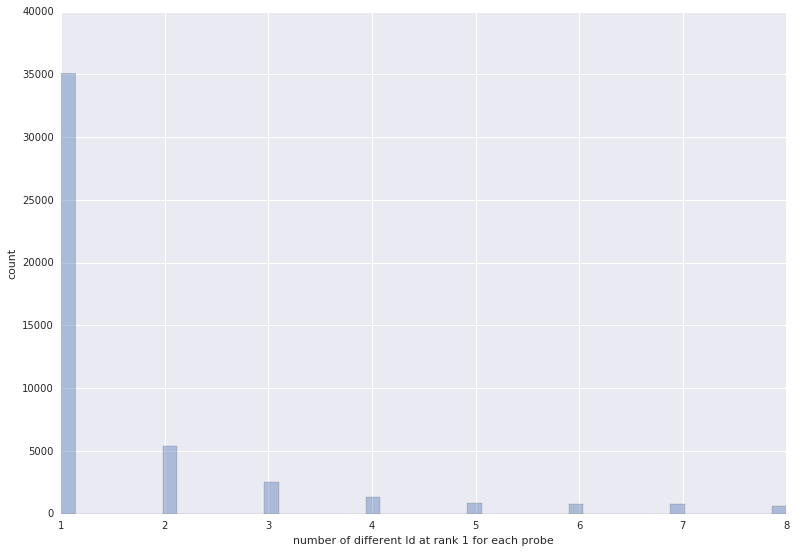

In [51]:
fig = plt.figure(figsize=(13,9))
ax = fig.gca()
sns.distplot(count_uniques, kde=False, hist=True, ax=ax)
ax.set_xlabel('number of different Id at rank 1 for each probe')
ax.set_ylabel('count')

In [79]:
predIdTrain = train['resultsId']  # identifiants prédits

count_uniques = []
for i in range(len(predIdTrain)):
    count_uniques.append(len(np.unique(predIdTrain[i,:,:3])))
    
count_uniques = np.asarray(count_uniques)

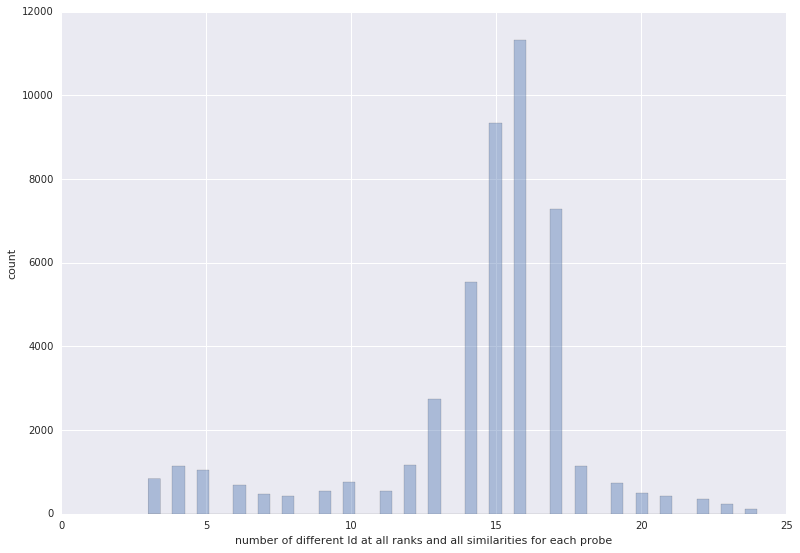

In [80]:
fig = plt.figure(figsize=(13,9))
ax = fig.gca()
sns.distplot(count_uniques, kde=False, hist=True, ax=ax)
ax.set_xlabel('number of different Id at all ranks and all similarities for each probe')
ax.set_ylabel('count')

## les scores des différentes fonctions sont-ils comparables ?

In [57]:
predScores = train['resultsScore']

stats = predScores.reshape((-1,8))

print stats.shape

df = pd.DataFrame(data=stats)

df.describe()

(4736300, 8)


,0,1,2,3,4,5,6,7
count,4736300.000000,4736300.000000,4736300.000000,4736300.000000,4736300.000000,4736300.000000,4736300.000000,4736300.000000
mean,3331.044678,3087.869385,3069.908447,3058.168945,3278.648682,3096.737793,3079.143066,3067.389893
std,2564.292885,711.197252,619.892833,579.492747,1991.642915,654.709167,591.861470,561.824428
min,2002.613892,2002.149414,1998.202271,1997.507324,1997.507324,1996.812866,1996.118652,1995.656738
25%,2648.755859,2631.014404,2625.962402,2622.177734,2655.110596,2650.794189,2646.600098,2642.861328
50%,3048.098389,3038.471436,3031.282959,3025.195557,3056.035645,3048.057373,3041.494873,3035.865356
75%,3438.023193,3413.328552,3401.693481,3392.354004,3449.144592,3426.806030,3413.711121,3402.642639
max,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,45528.132812


In [50]:
predIdf0 = train['resultsId'][0, 0 ,:]  # identifiants prédits avec la premiere fonction de similarité

predLabelf0 = [gallery[Id] for Id in predIdf0]

predScoref0 = 1./train['resultsScore'][0, 0 ,:] * 1e4  # Scores prédits avec la premiere fonction de similarité

print predIdf0
print
print predLabelf0
print
print predScoref0
print
print 'real label:', train['probeLabel'][0]

[ 41004  29667 130431 116675 127651  69335 128410  84230   3121 104012
  52991  69835 104185 138474  80768   2766  61940 147829  39020  35782
 109896  96758  97996  45482  69441 138990  79180  87602  67339  42662
 113501  80390 106340 114389  72298   6252 117743 115502 146421 116390
 124248 108259  34585  26698  34147 137578  80382 154864   3385  78881
 122936 127736  86860  54290  40737  58128  28434 142935  10091 119125
  84256  50198 123947 149039  72798  78905  39852  24315 118382  43469
  76809  80941 150796  67329  86659  98221  62133  30798  61721  66996
  95400  57972 147295  45788 123696  36323  44499  11513  56181  95195
  58703  28548  28286 148063  25759 101042  37154  24446  20515 158688]

[13721, 26694, 7610, 65463, 17181, 51818, 57058, 56302, 18531, 51623, 7436, 22548, 15854, 50267, 51968, 20806, 24054, 11472, 20618, 21863, 17236, 15819, 51726, 21079, 11526, 47919, 66100, 7417, 67888, 21378, 16657, 55552, 12050, 14359, 11679, 18628, 16666, 58540, 66124, 15070, 7361, 1423

## Les scores étant comparables, on peut choisir le plus élevé parmis les 8 similarités

In [71]:
predScores = train['resultsScore'][:,:,0]

print predScores.shape

index = np.argmax(predScores,axis=1)

print index[:10]
print index.shape

predId = [train['resultsId'][i,index[i],0] for i in range(len(index))]
predLabel = np.asarray([gallery[Id] for Id in predId])

print predLabel[:10]

accuracy = np.mean(predLabel == train['probeLabel'][:, 0])
print "acc with best score:", accuracy


predIdTrain = train['resultsId'][:, 0 ,0]  # identifiants prédits avec le premier ranking
predIdx = np.searchsorted(train['galleryId'][:, 0], predIdTrain) # extraction des indices dans la gallery
predLabel = train['galleryLabel'][predIdx, 0]  # extraction des labels correspondant

accuracy = np.mean(predLabel == train['probeLabel'][:, 0])
print
print "f0 acc:", accuracy

(47363, 8)
[6 7 6 5 4 5 4 6 5 4]
(47363,)
[13721 13722 48061 13724 52818 48068 13727 41955 48073 19604]
acc with best score: 0.936955007073

f0 acc: 0.941790004856


Prendre le meilleur score, parmis les 8 fonctions de similarité pour chaque probe n'améliore pas le résultat.

## En prenant l'identifiant majoritaire, parmis les 8 similarités

In [102]:

predId = train['resultsId'][0, : ,0]  # identifiants prédits avec le premier ranking

uniques, counts = np.unique(predId, return_counts=True)

print uniques
print counts

def compute_score(num):

    predId = train['resultsId'][:,:,:num]

    maj_Id = []
    for i in range(len(predId)):
        Ids, counts = np.unique(predId[i,:,:], return_counts=True)
        index = np.argmax(counts)
        maj_Id.append(Ids[index])

    maj_Id = np.asarray(maj_Id)

    predLabel = np.asarray([gallery[Id] for Id in maj_Id])

    accuracy = np.mean(predLabel == train['probeLabel'][:, 0])
    
    return accuracy
    

[41004 78881]
[7 1]


In [104]:
scores = []
for i in range(1,100):
    print i
    score = compute_score(i)
    scores.append(score)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


best num: 7 0.9696809746


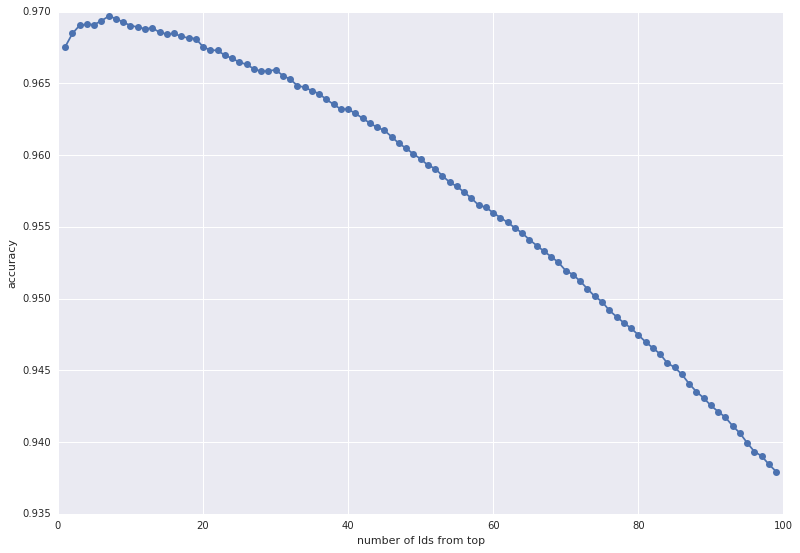

In [111]:
scores = np.asarray(scores)

num = range(1,100)

best_num = num[np.argmax(scores)]

print 'best num:', best_num, compute_score(best_num)



fig = plt.figure(figsize=(13,9))
ax = fig.gca()
ax.plot(range(1,100), scores, marker='o')
ax.set_xlabel('number of Ids from top')
ax.set_ylabel('accuracy')

## predictions sur les données test

In [120]:
test = io.loadmat('/home/max/projects/challengeMDI343/data/data_test.mat')
print(train.keys())

['galleryLabel', 'resultsId', 'probeId', '__header__', '__globals__', 'resultsScore', 'galleryId', '__version__']


In [121]:
print test['galleryId'][i][0]

gallery_test = {test['galleryId'][i][0]: test['galleryLabel'][i][0] for i in range(len(test['galleryLabel']))}

print gallery_test[1000143]

1067478
1030529


In [122]:
predId = test['resultsId'][:,:,:7]
maj_Id = []
for i in range(len(predId)):
    Ids, counts = np.unique(predId[i,:,:], return_counts=True)
    index = np.argmax(counts)
    maj_Id.append(Ids[index])

maj_Id = np.asarray(maj_Id)

predLabel = np.asarray([gallery_test[Id] for Id in maj_Id])

np.savetxt('soumission.txt', predLabel, fmt='%i')